In [1]:
import numpy as np

# Load data
data = np.load("/Users/minghan/Library/CloudStorage/GoogleDrive-john.chuicandoit@gmail.com/My Drive/CoNFiLD/data/Case3/data.npy")

# Print shape
print(f"Data shape: {data.shape}")

# Print a sample
print("Sample data values:", data[0])

Data shape: (2880, 10884, 2)
Sample data values: [[ 5.37805352e-03  4.09643049e-04]
 [ 2.59617753e-02  1.57873787e-03]
 [ 5.80011532e-02  3.46837193e-03]
 ...
 [ 1.71552330e-01  1.68331360e-04]
 [ 1.13230810e-01 -1.76819551e-04]
 [ 4.03335579e-02 -3.16522055e-05]]


In [2]:
import numpy as np

# Load data
data = np.load("/Users/minghan/Library/CloudStorage/GoogleDrive-john.chuicandoit@gmail.com/My Drive/CoNFiLD/data/Case3/data.npy")

# Find possible grid dimensions
num_points = data.shape[1]  # 10884
possible_grid_sizes = [(nx, num_points // nx) for nx in range(1, int(np.sqrt(num_points)) + 1) if num_points % nx == 0]

print("Possible grid sizes:", possible_grid_sizes)

Possible grid sizes: [(1, 10884), (2, 5442), (3, 3628), (4, 2721), (6, 1814), (12, 907)]


# Unstructured Mesh

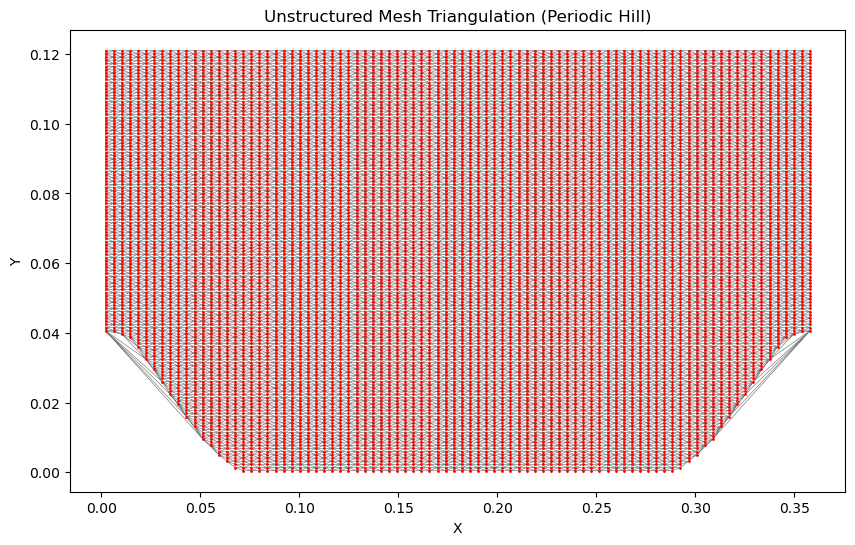

In [17]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

# Load coordinates
coords = np.load("/Users/minghan/Library/CloudStorage/GoogleDrive-john.chuicandoit@gmail.com/My Drive/CoNFiLD/data/Case3/coords.npy")  # Replace with actual path
x = coords[:, 0]
y = coords[:, 1]

# Create triangulation
triang = tri.Triangulation(x, y)

# Plot the triangulated mesh
plt.figure(figsize=(10, 6))
plt.triplot(triang, color='gray', linewidth=0.5)  # Show mesh connectivity
plt.scatter(x, y, s=1, color='red')  # Plot mesh points
plt.title("Unstructured Mesh Triangulation (Periodic Hill)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [3]:
import numpy as np

# Try to load coordinates
coords = np.load("/Users/minghan/Library/CloudStorage/GoogleDrive-john.chuicandoit@gmail.com/My Drive/CoNFiLD/data/Case3/coords.npy")  # Adjust path
print("Coords shape:", coords.shape)
print("Sample coords:", coords[:5])  # Print first 5 coordinates

Coords shape: (10884, 2)
Sample coords: [[0.00204545 0.0406188 ]
 [0.00204545 0.04153158]
 [0.00204545 0.04244436]
 [0.00204545 0.04335715]
 [0.00204545 0.04426993]]


In [4]:
import numpy as np

# Load velocity data and coordinates
data = np.load("/Users/minghan/Library/CloudStorage/GoogleDrive-john.chuicandoit@gmail.com/My Drive/CoNFiLD/data/Case3/data.npy")  # Replace with actual path
coords = np.load("/Users/minghan/Library/CloudStorage/GoogleDrive-john.chuicandoit@gmail.com/My Drive/CoNFiLD/data/Case3/coords.npy")  # Replace with actual path

# Extract spatial coordinates
x = coords[:, 0]  # X-coordinates
y = coords[:, 1]  # Y-coordinates

# Select a time step to visualize (e.g., t_index = 0)
t_index = 0
u = data[t_index, :, 0]  # X-velocity component (u)
v = data[t_index, :, 1]  # Y-velocity component (v)

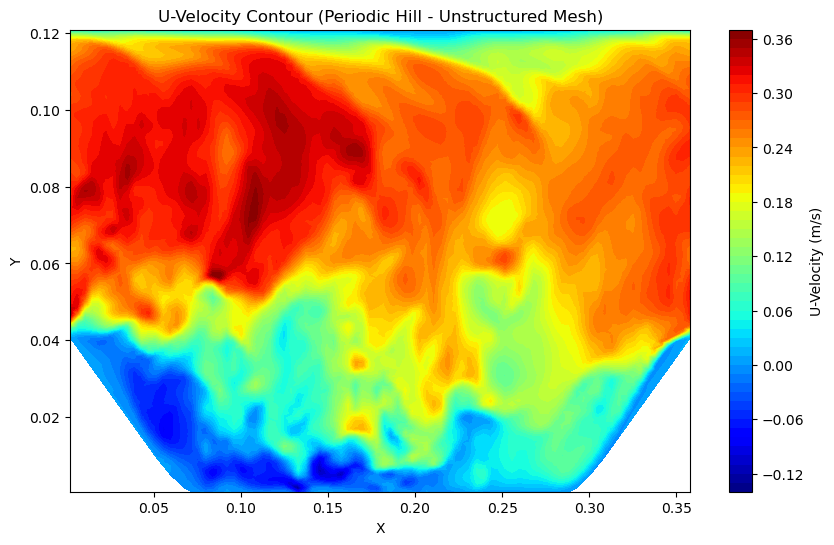

In [5]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri

# Create triangulation
triang = tri.Triangulation(x, y)

plt.figure(figsize=(10, 6))
plt.tricontourf(triang, u, levels=50, cmap="jet")
plt.colorbar(label="U-Velocity (m/s)")
plt.title("U-Velocity Contour (Periodic Hill - Unstructured Mesh)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

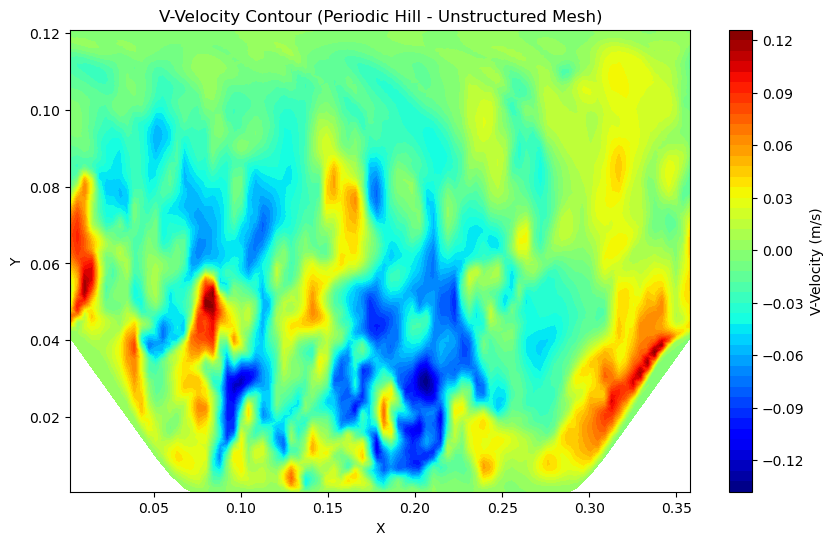

In [6]:
plt.figure(figsize=(10, 6))
plt.tricontourf(triang, v, levels=50, cmap="jet")
plt.colorbar(label="V-Velocity (m/s)")
plt.title("V-Velocity Contour (Periodic Hill - Unstructured Mesh)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

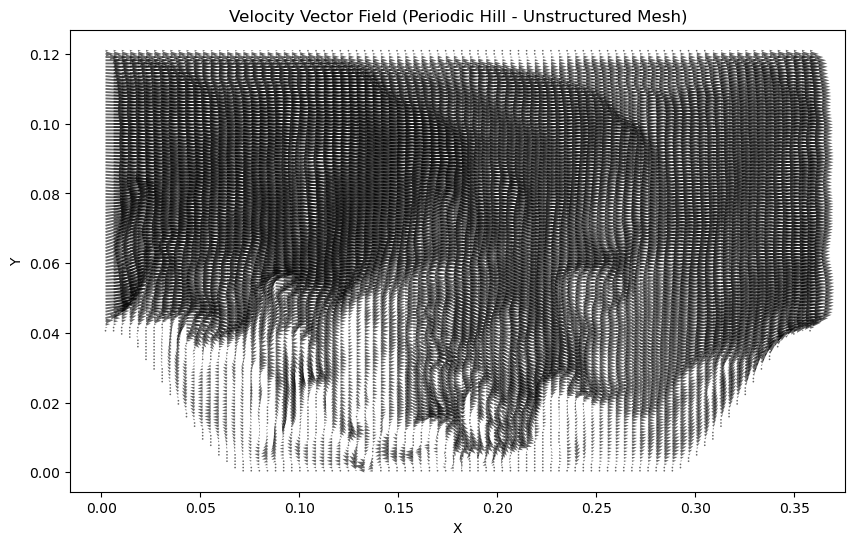

In [7]:
plt.figure(figsize=(10, 6))
plt.quiver(x, y, u, v, scale=10, alpha=0.6)  # Adjust scale if needed
plt.title("Velocity Vector Field (Periodic Hill - Unstructured Mesh)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# Structured Mesh

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Load velocity data and coordinates
data = np.load("/Users/minghan/Library/CloudStorage/GoogleDrive-john.chuicandoit@gmail.com/My Drive/CoNFiLD/data/Case3/data.npy")  # Replace with actual path
coords = np.load("/Users/minghan/Library/CloudStorage/GoogleDrive-john.chuicandoit@gmail.com/My Drive/CoNFiLD/data/Case3/coords.npy")  # Replace with actual path

# Extract X, Y coordinates
x = coords[:, 0]
y = coords[:, 1]

# Extract velocity components at first time step
t_index = 0
u = data[t_index, :, 0]  # X-velocity (u)
v = data[t_index, :, 1]  # Y-velocity (v)

In [5]:
# Define grid resolution (adjust for smoother interpolation)
grid_x, grid_y = 100, 50  # Example: 100x50 structured grid

# Create a structured grid
x_min, x_max = x.min(), x.max()
y_min, y_max = y.min(), y.max()

X_new, Y_new = np.meshgrid(
    np.linspace(x_min, x_max, grid_x),
    np.linspace(y_min, y_max, grid_y)
)

In [6]:
# Interpolate velocity onto structured grid
U_new = griddata((x, y), u, (X_new, Y_new), method='cubic')
V_new = griddata((x, y), v, (X_new, Y_new), method='cubic')

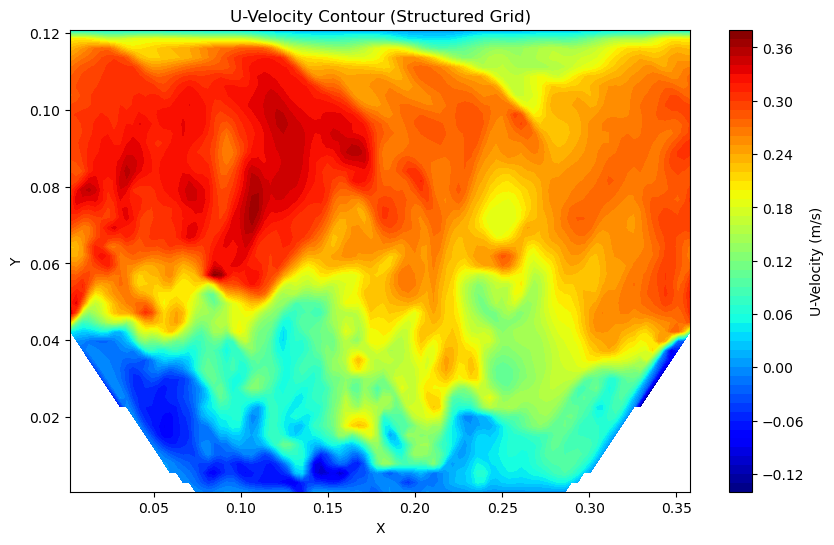

In [9]:
plt.figure(figsize=(10, 6))
plt.contourf(X_new, Y_new, U_new, levels=50, cmap="jet")
plt.colorbar(label="U-Velocity (m/s)")
plt.title("U-Velocity Contour (Structured Grid)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

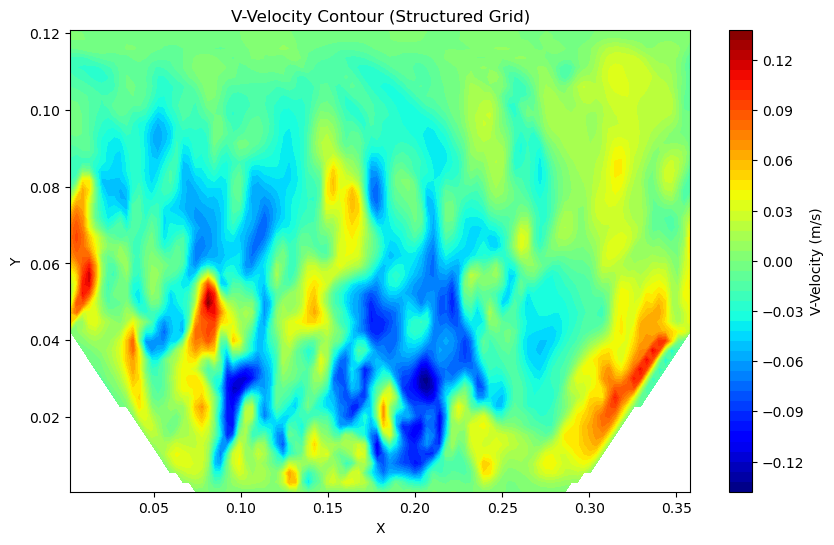

In [15]:
plt.figure(figsize=(10, 6))
plt.contourf(X_new, Y_new, V_new, levels=50, cmap="jet")
plt.colorbar(label="V-Velocity (m/s)")
plt.title("V-Velocity Contour (Structured Grid)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

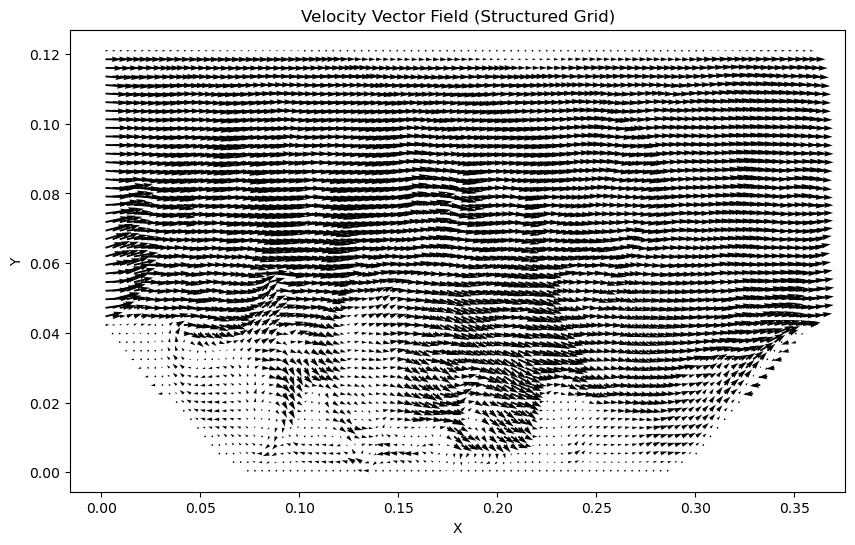

In [8]:
plt.figure(figsize=(10, 6))
plt.quiver(X_new, Y_new, U_new, V_new, scale=10)
plt.title("Velocity Vector Field (Structured Grid)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()